1.2 Twitter data analysis and visualization
======


**In this section we use the data gathered in 1.1 to experiment different ways of visualizing Twitter data. We start by importing the data from the csv file and checking the data frame, and then use the data to plot barcharts on number of tweets and number of followers for each user. Next we create mapping visualization from user location data, and do sentiment analysis on tweets. Lastly we show how to creat word cloud from all tweet text and plot barchart on word frequency.**

1.2.1 Check data frame information 
------

**Import numpy and pandas python libraries for data processing.**

In [1]:
# import numpy and pandas python libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

**read csv file from 1.1.1 to dataframe, remove first column (index)**

In [2]:
# read csv to dataframe, remove first column (index)
df = pd.read_csv("dh_tweets.csv") 
df = df.drop(df.columns[0], axis=1)


**Check and inspect dataframe.**

In [3]:
# check dataframe
df.head()

,text,user.name,user.statuses_count,user.screen_name,user.followers_count,user.location,user.verified,user.profile_image_url_https,favorite_count,retweet_count,created_at,hashtags,quoted_hashtags,user_lat,user_lng
0,RT @EmilyJLB: Folks who’ve built digital editi...,blueciren,230,kiun2020,1,NaN,False,https://pbs.twimg.com/profile_images/128155124...,0,3,2020-12-13 11:42:48,[],[],NaN,NaN
1,RT @EmilyJLB: Folks who’ve built digital editi...,RedInt,6669,desemboltura,800,대한민국 서울,False,https://pbs.twimg.com/profile_images/109283546...,0,3,2020-12-13 09:11:08,[],[],37.566679,126.978291
2,"RT @faberllull: #opencall \n\nScience, technol...",faberllull,2512,faberllull,2402,Olot & Andorra,False,https://pbs.twimg.com/profile_images/127788643...,0,7,2020-12-12 20:03:27,"['opencall', 'digitalhumanities']",[],NaN,NaN
3,"RT @faberllull: #opencall \n\nScience, technol...",Llull London,3701,IRLlull_London,1637,UK and Ireland,False,https://pbs.twimg.com/profile_images/106086701...,0,7,2020-12-12 20:02:21,"['opencall', 'digitalhumanities']",[],53.398923,-2.352557
4,RT @EEditiones: Have you been nice or naughty?...,Magdalena Turska,1144,magdaturska,351,Warsaw,False,https://pbs.twimg.com/profile_images/464165916...,0,12,2020-12-12 12:35:23,[],[],52.231958,21.006725


In [4]:
# check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   text                          51 non-null     object 
 1   user.name                     51 non-null     object 
 2   user.statuses_count           51 non-null     int64  
 3   user.screen_name              51 non-null     object 
 4   user.followers_count          51 non-null     int64  
 5   user.location                 34 non-null     object 
 6   user.verified                 51 non-null     bool   
 7   user.profile_image_url_https  51 non-null     object 
 8   favorite_count                51 non-null     int64  
 9   retweet_count                 51 non-null     int64  
 10  created_at                    51 non-null     object 
 11  hashtags                      51 non-null     object 
 12  quoted_hashtags               51 non-null     object 
 13  user_la

1.2.2 Bar chart visualization 
------

**Import required libraries matplotlib, plotly, textblob, wordcloud, cufflinks etc for data visualisation.**

In [5]:
# import required libraries for visualisation 
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)
import matplotlib.pyplot as plt


**Plot barchart for Number of twitter for each user and sort by number**

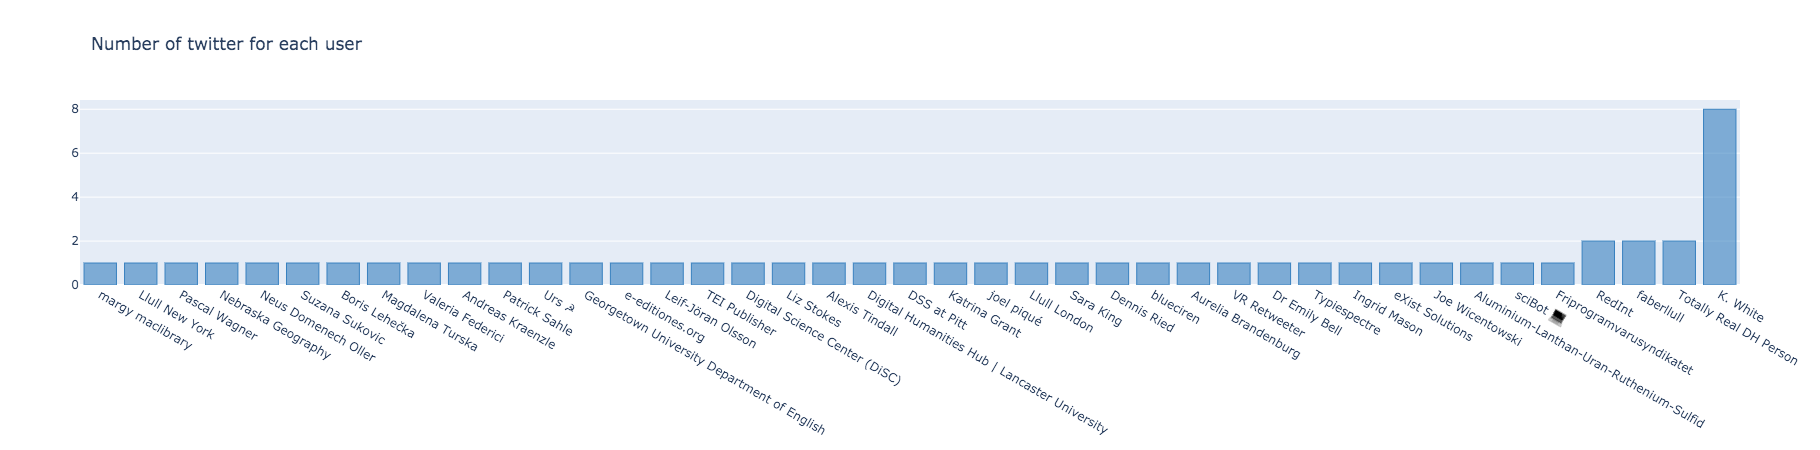

In [6]:

# plot barchart for Number of twitter for each user
layout1=dict(autosize=True, xaxis=dict(automargin=True),title="Number of twitter for each user")
df['user.name'].value_counts(ascending=True).iplot(kind='bar',title="Number of twitter for each user", color="blue",layout=layout1)


**Create data frame for number of followers for each user. Show the sorted data frame for user and user_followers.**

In [7]:

# print table for number of followers for each user
followersdf = pd.DataFrame(df, columns=['user.name','user.followers_count']).drop_duplicates()
followersdf.sort_values(["user.followers_count", "user.name"], axis=0, ascending=False, inplace=True)
print(followersdf)


                                        user.name  user.followers_count
6                                   Dr Emily Bell                  5170
33                               margy maclibrary                  4253
37                                   Ingrid Mason                  3380
2                                      faberllull                  2402
43                            Aurelia Brandenburg                  2319
50                                  Patrick Sahle                  1795
3                                    Llull London                  1637
28                                 Llull New York                  1493
39                                  Katrina Grant                  1472
32                                 Suzana Sukovic                  1277
21  Digital Humanities Hub | Lancaster University                  1203
46                                  Pascal Wagner                  1159
36                                     Liz Stokes               


**Plot barchart for Number of User Followers for each user and sort by number.**

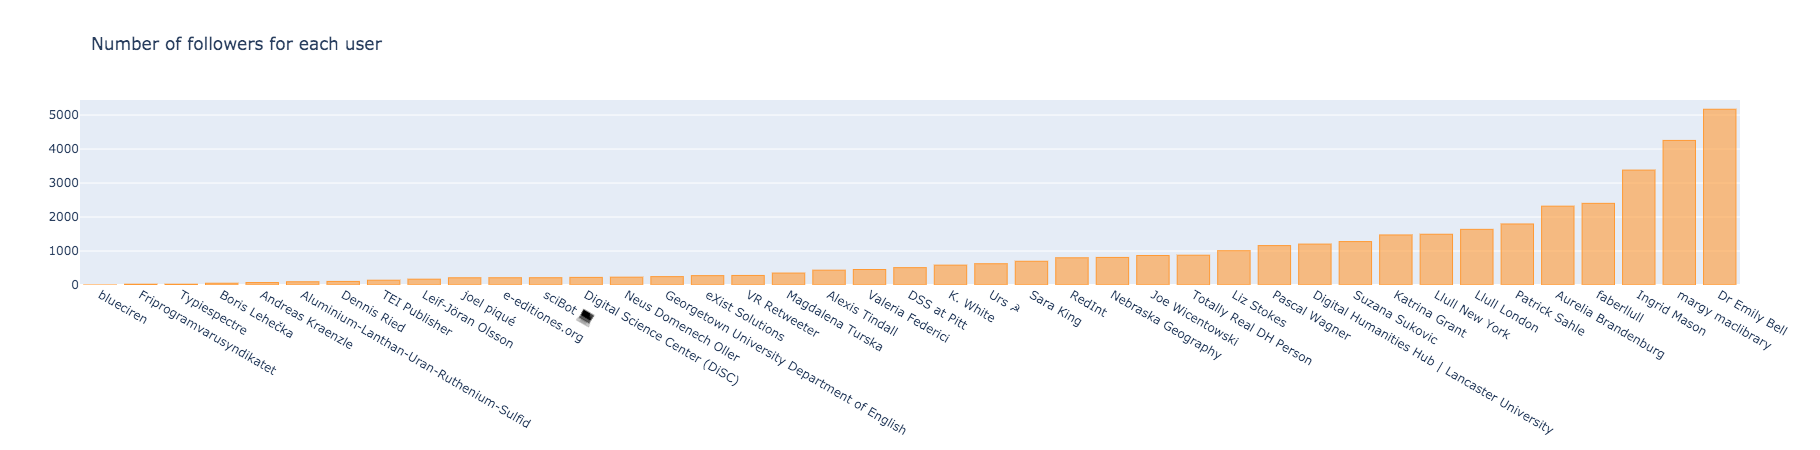

In [8]:

# plot barchart for Number of User Followers for each user, use default color
layout1=dict(autosize=True, xaxis=dict(automargin=True),title="Number of followers for each user")
followersdf.sort_values("user.followers_count", ascending=True).iplot(kind="bar",x="user.name", y="user.followers_count", title="Number of Followers", layout=layout1);


1.2.3 Mapping visualization 
------

**Show mapping visualization from User_lat and User_lng data.**

In [9]:
import folium
# remove rows which  latitude data is NA
loc_df = df[df['user_lat'].notna()]
# map initialization, set map centre and zoom level
folium_map = folium.Map(location=[26.43, 12.59], zoom_start=3, tiles="cartodbpositron")

# show the twtter markers on the map from loc_df dataframe
for index, row in loc_df.iterrows():
    # popup text header
    popup_text = """
                <img src={} style="width:100px;height:100px;"><br>
                Twitter handle: {}<br> 
                User followers: {}<br>
                User screen name: {}<br>
                Tweet date: {}<br>
                Retweet count: {}<br>
                Favorite count: {}"""
    # popup text content
    popup_text = popup_text.format(row["user.profile_image_url_https"],
                               row["user.name"],
                               row["user.followers_count"],
                               row["user.screen_name"],
                               row["created_at"],
                               row["retweet_count"],
                               row["favorite_count"])
    # tooltip content
    tooltip = row["user.name"]
    # draw marker on map
    folium.Marker(location=(float(row["user_lat"])+np.random.uniform(0.001, 10**(-20))-0.005,float(row["user_lng"])+np.random.uniform(0.001, 10**(-20))-0.005),
                  icon=folium.Icon(icon='twitter',prefix='fa', color='blue'),
                  popup=popup_text,
                  tooltip=tooltip).add_to(folium_map)
    

# show map
folium_map


1.2.4 Sentiment analysis and visualization 
------

**Clean data text before performing sentiment analysis. Create function to analyze sentiment from cleaned text. Show barchart for the sentiment from data.**

In [10]:
# function to clean tweet data
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())


In [11]:
# function to return sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
# import Regular Expression python library
import re
# apply clean_tweet and analyze_sentiment to twitter data
df['clean_tweet'] = df['text'].apply(lambda x: clean_tweet(x))
df['Sentiment'] = df['clean_tweet'].apply(lambda x: get_sentiment(x))


In [13]:
# check 1st tweet sentiment 

n=1
print('Original tweet:\n'+ df['text'][n])
print()
print('Clean tweet:\n'+df['clean_tweet'][n])
print()
print('Sentiment:\n'+df['Sentiment'][n])

Original tweet:
RT @EmilyJLB: Folks who’ve built digital editions in Wordpress: do you know of any plugins to enhance the search functionality? Or really j…

Clean tweet:
RT Folks who ve built digital editions in Wordpress do you know of any plugins to enhance the search functionality Or really j

Sentiment:
Positive


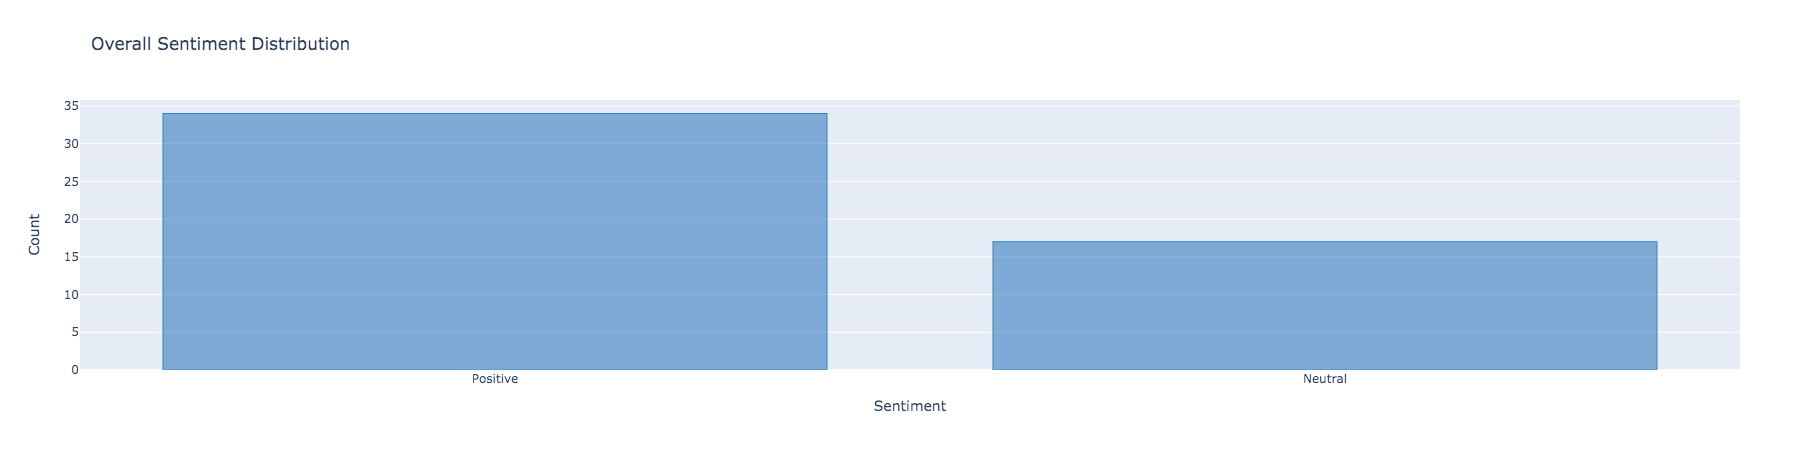

In [14]:
# show barchart of overall tweet sentiment
layout1=dict(autosize=True, yaxis=dict(automargin=True, title="Count"), xaxis=dict(automargin=True, title="Sentiment"),title="Overall Sentiment Distribution")
df['Sentiment'].value_counts().iplot(kind='bar', title='Overall Sentiment Distribution', color="blue", layout=layout1)


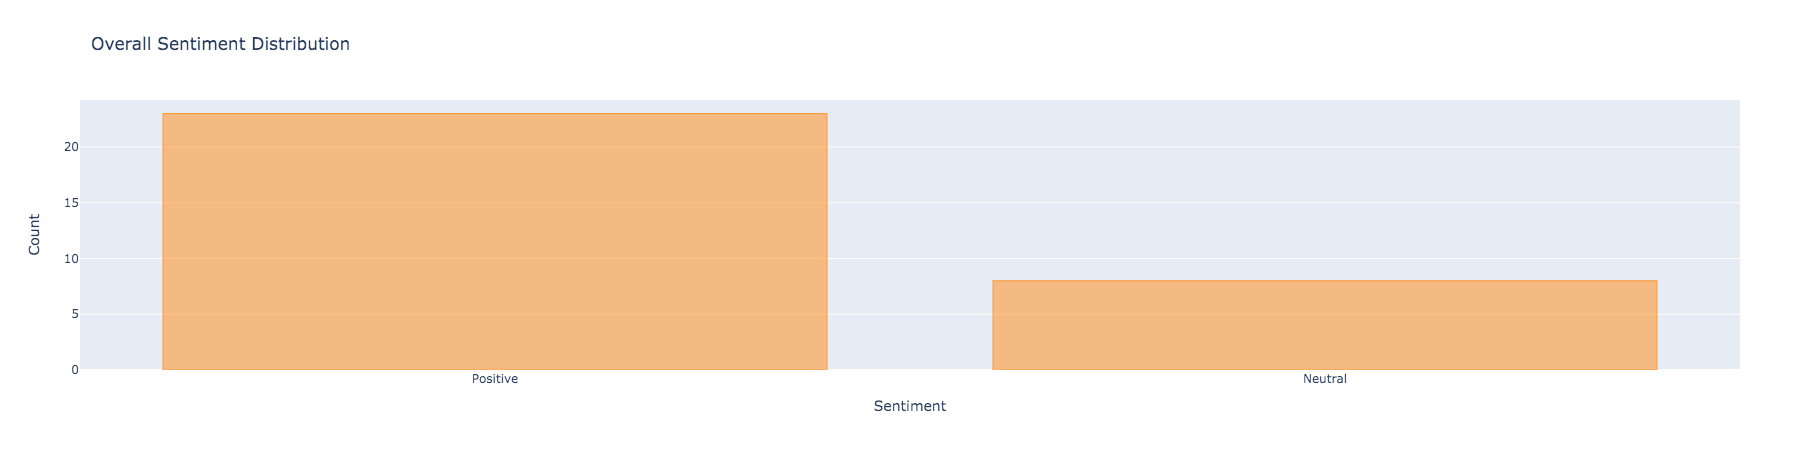

In [15]:
# show barchart of retweet>=5 tweet sentiment
df_over5 = df[df['retweet_count'] >= 5]
layout1=dict(autosize=True, yaxis=dict(automargin=True, title="Count"), xaxis=dict(automargin=True, title="Sentiment"),title="Overall Sentiment Distribution")
df_over5['Sentiment'].value_counts().iplot(kind='bar', title = 'Sentiment Distribution for <br> tweets (Above 5)', layout=layout1)


1.2.5 Wordcloud visualization 
------

**Use text from cleaned tweets to perform wordcloud visualization.**

In [16]:
# join clean_tweets to create text for wordcloud
wordcloud_tweets = ' '.join(tweet for tweet in df['clean_tweet'])
# remove stopwords and generate wordcloud content
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords=STOPWORDS).generate(wordcloud_tweets)


**Show the Wordcloud.**

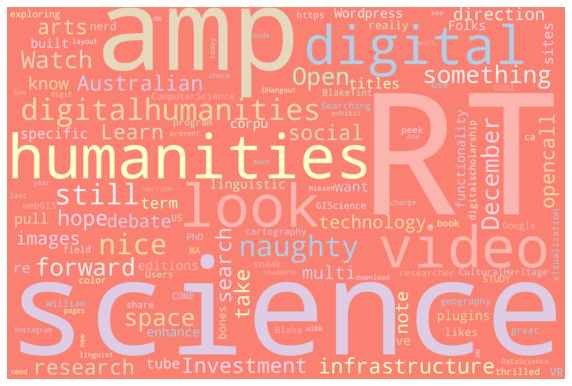

In [17]:
# import python plot graph library
import matplotlib.pyplot as plt
# show wordcloud
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Show barchart from word frequency and order by frequency.**

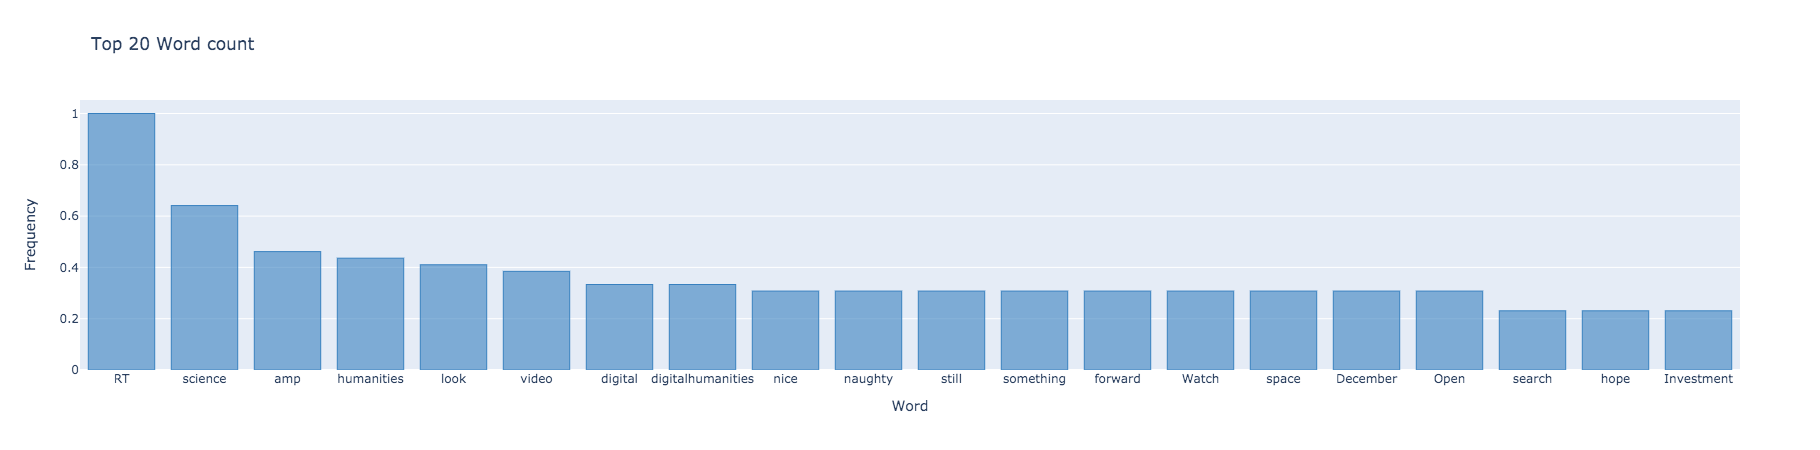

In [18]:
# show barchart form word frequency
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
layout1=dict(autosize=True, yaxis=dict(automargin=True, title="Frequency"), xaxis=dict(automargin=True, title="Word"),title="Top 20 Word count")
df_freq.iplot(kind='bar', title = 'Top 20 Word frequency', color="blue", layout=layout1)


### Reference:
**How to get API Keys and Tokens for Twitter<br/>
https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/<br/>
Stream Tweets in Under 15 Lines of Code + Some Interactive Data Visualization<br/>
https://dzone.com/articles/stream-tweets-the-easy-way-in-under-15-lines-of-co<br/>
Twitter Firehose vs. Twitter API: What’s the difference and why should you care?<br/>
https://brightplanet.com/2013/06/25/twitter-firehose-vs-twitter-api-whats-the-difference-and-why-should-you-care/ <br/>
Twitter Data Visualisation<br/>
https://nbviewer.jupyter.org/github/SantaDS/DataVisualisation/blob/master/TwitterDataAnalysis/twitter_data_analysis.ipynb<br/>
Dynamic Visualization For Twitter Data<br/>
https://github.com/shihao1007/vggm<br/>
Mine Twitter's Stream For Hashtags Or Words<br/>
https://chrisalbon.com/python/other/mine_a_twitter_hashtags_and_words/<br/>
Twitter Data Visualisation<br/>
https://www.kaggle.com/tuncbileko/twitter-data-visualisation/<br/>
Tweepy API Reference<br/>
http://docs.tweepy.org/en/latest/api.html#API.search<br/>
Tweepy Streaming<br/>
https://github.com/tweepy/tweepy/blob/78d2883a922fa5232e8cdfab0c272c24b8ce37c4/tweepy/streaming.py<br/>
Twitter API<br/>
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user<br/>**